# Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_columns', 150)

# Importing Data

In [2]:
df = pd.read_csv('client_and_price_data.csv')
df.head()

,Unnamed: 0,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,price_off_peak_var_x,price_peak_var_x,price_mid_peak_var_x,price_off_peak_fix_x,price_peak_fix_x,price_mid_peak_fix_x,price_off_peak_var_y,price_peak_var_y,price_mid_peak_var_y,price_off_peak_fix_y,price_peak_fix_y,price_mid_peak_fix_y,mean_6m_price_p1,mean_6m_price_p2,mean_6m_price_p3,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3,churn
0,0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,0.124787,0.100749,0.066530,40.942265,22.352010,14.901340,0.123598,0.098104,0.061525,41.318559,20.364442,13.576296,41.442157,13.637821,20.462545,0.131756,0.092638,0.036909,42.497907,12.218665,8.145777,42.629663,8.182687,12.311304,1
1,1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0.149609,0.007124,0.000000,44.311375,0.000000,0.000000,0.147851,0.014247,0.000000,44.355820,0.000000,0.000000,44.503671,0.000000,0.014247,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0
2,2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0.170512,0.088421,0.000000,44.385450,0.000000,0.000000,0.168569,0.088535,0.000000,44.444710,0.000000,0.000000,44.613279,0.000000,0.088535,0.167798,0.088409,0.000000,44.444710,0.000000,0.000000,44.612508,0.000000,0.088409,0
3,3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0.151210,0.000000,0.000000,44.400265,0.000000,0.000000,0.149330,0.000000,0.000000,44.444710,0.000000,0.000000,44.594040,0.000000,0.000000,0.148586,0.000000,0.000000,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000,0
4,4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0.124174,0.103638,0.072865,40.688156,24.412893,16.275263,0.121266,0.102368,0.073728,40.728885,24.437330,16.291555,40.850151,16.365283,24.539698,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555,40.848791,16.365274,24.539003,0


In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
df.shape

(14605, 50)

In [24]:
# Create Data Info After Convert

list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(), 100*df[col].isna().sum()/len(df[col]), df[col].nunique(), df[col].unique()[:4]])
desc_df = pd.DataFrame(data=list_item, columns='feature data_type null_num null_pct unique_num unique_sample'.split())
desc_df

,feature,data_type,null_num,null_pct,unique_num,unique_sample
0,Unnamed: 0,int64,0,0.0,14605,"[0, 1, 2, 3]"
1,id,object,0,0.0,14605,"[24011ae4ebbe3035111d65fa7c15bc57, d29c2c54acc..."
2,channel_sales,object,0,0.0,8,"[foosdfpfkusacimwkcsosbicdxkicaua, MISSING, lm..."
3,cons_12m,int64,0,0.0,11064,"[0, 4660, 544, 1584]"
4,cons_gas_12m,int64,0,0.0,2111,"[54946, 0, 1542867, 80583]"
5,cons_last_month,int64,0,0.0,4751,"[0, 526, 1998, 1260]"
6,date_activ,object,0,0.0,1796,"[2013-06-15, 2009-08-21, 2010-04-16, 2010-03-30]"
7,date_end,object,0,0.0,368,"[2016-06-15, 2016-08-30, 2016-04-16, 2016-03-30]"
8,date_modif_prod,object,0,0.0,2129,"[2015-11-01, 2009-08-21, 2010-04-16, 2010-03-30]"
9,date_renewal,object,0,0.0,386,"[2015-06-23, 2015-08-31, 2015-04-17, 2015-03-31]"


## Feature Engineering

In [5]:
price_df = pd.read_csv('price_data.csv')

### `Difference between off-peak prices in December and January the preceding year`

In [6]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001


In [7]:
diff.shape

(16096, 3)

In [8]:
df = pd.merge(df, diff, on='id')
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,price_off_peak_var_x,price_peak_var_x,price_mid_peak_var_x,price_off_peak_fix_x,price_peak_fix_x,price_mid_peak_fix_x,price_off_peak_var_y,price_peak_var_y,price_mid_peak_var_y,price_off_peak_fix_y,price_peak_fix_y,price_mid_peak_fix_y,mean_6m_price_p1,mean_6m_price_p2,mean_6m_price_p3,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,0.124787,0.100749,0.066530,40.942265,22.352010,14.901340,0.123598,0.098104,0.061525,41.318559,20.364442,13.576296,41.442157,13.637821,20.462545,0.131756,0.092638,0.036909,42.497907,12.218665,8.145777,42.629663,8.182687,12.311304,1,0.020057,3.700961
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0.149609,0.007124,0.000000,44.311375,0.000000,0.000000,0.147851,0.014247,0.000000,44.355820,0.000000,0.000000,44.503671,0.000000,0.014247,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0,-0.003767,0.177779
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0.170512,0.088421,0.000000,44.385450,0.000000,0.000000,0.168569,0.088535,0.000000,44.444710,0.000000,0.000000,44.613279,0.000000,0.088535,0.167798,0.088409,0.000000,44.444710,0.000000,0.000000,44.612508,0.000000,0.088409,0,-0.004670,0.177779
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0.151210,0.000000,0.000000,44.400265,0.000000,0.000000,0.149330,0.000000,0.000000,44.444710,0.000000,0.000000,44.594040,0.000000,0.000000,0.148586,0.000000,0.000000,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000,0,-0.004547,0.177779
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0.124174,0.103638,0.072865,40.688156,24.412893,16.275263,0.121266,0.102368,0.073728,40.728885,24.437330,16.291555,40.850151,16.365283,24.539698,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555,40.848791,16.365274,24.539003,0,-0.006192,0.162916


In [9]:
df.shape

(14605, 52)

### `Price Difference Between Peak Periods`

Same as between December and January above.

In [10]:
avg_prices = price_df.groupby('id').agg(price_off_peak_energy=('price_off_peak_var','mean'),
                                        price_mid_peak_energy=('price_mid_peak_var','mean'),
                                        price_peak_energy=('price_peak_var','mean'),
                                        price_off_peak_power=('price_off_peak_fix','mean'),
                                        price_mid_peak_power=('price_mid_peak_fix','mean'),
                                        price_peak_power=('price_peak_fix','mean')).reset_index()

# Calculate the mean difference between consecutive periods
avg_prices['offpeak_peak_avg_price_energy_diff'] = avg_prices['price_off_peak_energy'] - avg_prices['price_peak_energy']
avg_prices['peak_mid_avg_price_energy_diff'] = avg_prices['price_peak_energy'] - avg_prices['price_mid_peak_energy']
avg_prices['off_mid_peak_avg_price_energy_diff'] = avg_prices['price_off_peak_energy'] - avg_prices['price_mid_peak_energy']
avg_prices['offpeak_peak_avg_price_power_diff'] = avg_prices['price_off_peak_power'] - avg_prices['price_peak_power']
avg_prices['peak_mid_avg_price_power_diff'] = avg_prices['price_peak_power'] - avg_prices['price_mid_peak_power']
avg_prices['off_mid_peak_avg_price_power_diff'] = avg_prices['price_off_peak_power'] - avg_prices['price_mid_peak_power']

avg_prices.head()

,id,price_off_peak_energy,price_mid_peak_energy,price_peak_energy,price_off_peak_power,price_mid_peak_power,price_peak_power,offpeak_peak_avg_price_energy_diff,peak_mid_avg_price_energy_diff,off_mid_peak_avg_price_energy_diff,offpeak_peak_avg_price_power_diff,peak_mid_avg_price_power_diff,off_mid_peak_avg_price_power_diff
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.073160,0.103794,40.701732,16.280694,24.421038,0.020545,0.030633,0.051178,16.280694,8.140345,24.421038
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,0.146426,0.000000,0.146426,44.385450,0.000000,44.385450
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,0.181558,0.000000,0.181558,45.319710,0.000000,45.319710
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.069032,0.098292,40.647427,16.258971,24.388455,0.020465,0.029260,0.049725,16.258972,8.129484,24.388456
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,0.147926,0.000000,0.147926,44.266930,0.000000,44.266930


In [11]:
avg_prices.shape

(16096, 13)

In [12]:
# get only difference features and id
col = avg_prices.iloc[:,[0,-6,-5,-4,-3,-2,-1]].columns

# merge
df = pd.merge(df, avg_prices[col], on='id')
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,price_off_peak_var_x,price_peak_var_x,price_mid_peak_var_x,price_off_peak_fix_x,price_peak_fix_x,price_mid_peak_fix_x,price_off_peak_var_y,price_peak_var_y,price_mid_peak_var_y,price_off_peak_fix_y,price_peak_fix_y,price_mid_peak_fix_y,mean_6m_price_p1,mean_6m_price_p2,mean_6m_price_p3,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,offpeak_peak_avg_price_energy_diff,peak_mid_avg_price_energy_diff,off_mid_peak_avg_price_energy_diff,offpeak_peak_avg_price_power_diff,peak_mid_avg_price_power_diff,off_mid_peak_avg_price_power_diff
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,0.124787,0.100749,0.066530,40.942265,22.352010,14.901340,0.123598,0.098104,0.061525,41.318559,20.364442,13.576296,41.442157,13.637821,20.462545,0.131756,0.092638,0.036909,42.497907,12.218665,8.145777,42.629663,8.182687,12.311304,1,0.020057,3.700961,0.024038,0.034219,0.058257,18.590255,7.450670,26.040925
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0.149609,0.007124,0.000000,44.311375,0.000000,0.000000,0.147851,0.014247,0.000000,44.355820,0.000000,0.000000,44.503671,0.000000,0.014247,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0,-0.003767,0.177779,0.142485,0.007124,0.149609,44.311375,0.000000,44.311375
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0.170512,0.088421,0.000000,44.385450,0.000000,0.000000,0.168569,0.088535,0.000000,44.444710,0.000000,0.000000,44.613279,0.000000,0.088535,0.167798,0.088409,0.000000,44.444710,0.000000,0.000000,44.612508,0.000000,0.088409,0,-0.004670,0.177779,0.082090,0.088421,0.170512,44.385450,0.000000,44.385450
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0.151210,0.000000,0.000000,44.400265,0.000000,0.000000,0.149330,0.000000,0.000000,44.444710,0.000000,0.000000,44.594040,0.000000,0.000000,0.148586,0.000000,0.000000,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000,0,-0.004547,0.177779,0.151210,0.000000,0.151210,44.400265,0.000000,44.400265
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0.124174,0.103638,0.072865,40.688156,24.412893,16.275263,0.121266,0.102368,0.073728,40.728885,24.437330,16.291555,40.850151,16.365283,24.539698,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555,40.848791,16.365274,24.539003,0,-0.006192,0.162916,0.020536,0.030773,0.051309,16.275263,8.137629,24.412893


In [33]:
df.shape

(14605, 59)

### `Tenure`

In [13]:
# Convert string columns to datetime
df['date_end'] = pd.to_datetime(df['date_end'])
df['date_activ'] = pd.to_datetime(df['date_activ'])
df['date_modif_prod'] = pd.to_datetime(df['date_modif_prod'])
df['date_renewal'] = pd.to_datetime(df['date_renewal'])

In [14]:
df['tenure'] = ((df['date_end'] - df['date_activ'])/ np.timedelta64(1, 'Y')).astype(int)

### `Month`

In [15]:
from datetime import datetime

# create function
def convert_months(reference_date, df, column):
    time_delta = reference_date - df[column]
    months = (time_delta / np.timedelta64(1, 'M')).astype(int)
    return months

# Create reference date
reference_date = datetime(2016, 1, 1)

# Create columns
df['months_activ'] = convert_months(reference_date, df, 'date_activ')
df['months_to_end'] = -convert_months(reference_date, df, 'date_end')
df['months_modif_prod'] = convert_months(reference_date, df, 'date_modif_prod')
df['months_renewal'] = convert_months(reference_date, df, 'date_renewal')

# drop original features
drop_list = ['date_activ','date_end','date_modif_prod','date_renewal']
df = df.drop(drop_list, axis=1)
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,price_off_peak_var_x,price_peak_var_x,price_mid_peak_var_x,price_off_peak_fix_x,price_peak_fix_x,price_mid_peak_fix_x,price_off_peak_var_y,price_peak_var_y,price_mid_peak_var_y,price_off_peak_fix_y,price_peak_fix_y,price_mid_peak_fix_y,mean_6m_price_p1,mean_6m_price_p2,mean_6m_price_p3,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,offpeak_peak_avg_price_energy_diff,peak_mid_avg_price_energy_diff,off_mid_peak_avg_price_energy_diff,offpeak_peak_avg_price_power_diff,peak_mid_avg_price_power_diff,off_mid_peak_avg_price_power_diff,tenure,months_activ,months_to_end,months_modif_prod,months_renewal
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,0.124787,0.100749,0.066530,40.942265,22.352010,14.901340,0.123598,0.098104,0.061525,41.318559,20.364442,13.576296,41.442157,13.637821,20.462545,0.131756,0.092638,0.036909,42.497907,12.218665,8.145777,42.629663,8.182687,12.311304,1,0.020057,3.700961,0.024038,0.034219,0.058257,18.590255,7.450670,26.040925,3,30,5,2,6
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0.149609,0.007124,0.000000,44.311375,0.000000,0.000000,0.147851,0.014247,0.000000,44.355820,0.000000,0.000000,44.503671,0.000000,0.014247,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0,-0.003767,0.177779,0.142485,0.007124,0.149609,44.311375,0.000000,44.311375,7,76,7,76,4
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0.170512,0.088421,0.000000,44.385450,0.000000,0.000000,0.168569,0.088535,0.000000,44.444710,0.000000,0.000000,44.613279,0.000000,0.088535,0.167798,0.088409,0.000000,44.444710,0.000000,0.000000,44.612508,0.000000,0.088409,0,-0.004670,0.177779,0.082090,0.088421,0.170512,44.385450,0.000000,44.385450,6,68,3,68,8
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0.151210,0.000000,0.000000,44.400265,0.000000,0.000000,0.149330,0.000000,0.000000,44.444710,0.000000,0.000000,44.594040,0.000000,0.000000,0.148586,0.000000,0.000000,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000,0,-0.004547,0.177779,0.151210,0.000000,0.151210,44.400265,0.000000,44.400265,6,69,2,69,9
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0.124174,0.103638,0.072865,40.688156,24.412893,16.275263,0.121266,0.102368,0.073728,40.728885,24.437330,16.291555,40.850151,16.365283,24.539698,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555,40.848791,16.365274,24.539003,0,-0.006192,0.162916,0.020536,0.030773,0.051309,16.275263,8.137629,24.412893,6,71,2,71,9


## Feature Encoding

In [16]:
#List out column names of object dtype
cat = df.select_dtypes(include='object').columns
cat

Index(['id', 'channel_sales', 'has_gas', 'origin_up'], dtype='object')

In [17]:
# has_gas

# Convert to '0' when = f and '1' when not
df['has_gas'] = np.where(df['has_gas']=='f',0,1)
df['has_gas'].value_counts()

0    11955
1     2650
Name: has_gas, dtype: int64

In [18]:
# origin_up and channel_sales

#One hot encoding
categorical_features = pd.get_dummies(df[cat].iloc[:,[1,2]])

# drop original feature
df = df.drop(['channel_sales', 'origin_up'], axis=1)

# concatenate
df = pd.concat([df, categorical_features], axis=1)
df.shape

(14605, 66)

In [19]:
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,price_off_peak_var_x,price_peak_var_x,price_mid_peak_var_x,price_off_peak_fix_x,price_peak_fix_x,price_mid_peak_fix_x,price_off_peak_var_y,price_peak_var_y,price_mid_peak_var_y,price_off_peak_fix_y,price_peak_fix_y,price_mid_peak_fix_y,mean_6m_price_p1,mean_6m_price_p2,mean_6m_price_p3,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,offpeak_peak_avg_price_energy_diff,peak_mid_avg_price_energy_diff,off_mid_peak_avg_price_energy_diff,offpeak_peak_avg_price_power_diff,peak_mid_avg_price_power_diff,off_mid_peak_avg_price_power_diff,tenure,months_activ,months_to_end,months_modif_prod,months_renewal,has_gas,channel_sales_MISSING,channel_sales_epumfxlbckeskwekxbiuasklxalciiuu,channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci,channel_sales_fixdbufsefwooaasfcxdxadsiekoceaa,channel_sales_foosdfpfkusacimwkcsosbicdxkicaua,channel_sales_lmkebamcaaclubfxadlmueccxoimlema,channel_sales_sddiedcslfslkckwlfkdpoeeailfpeds,channel_sales_usilxuppasemubllopkaafesmlibmsdf
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,1,0.00,25.44,25.44,2,678.99,3,43.648,0.124787,0.100749,0.066530,40.942265,22.352010,14.901340,0.123598,0.098104,0.061525,41.318559,20.364442,13.576296,41.442157,13.637821,20.462545,0.131756,0.092638,0.036909,42.497907,12.218665,8.145777,42.629663,8.182687,12.311304,1,0.020057,3.700961,0.024038,0.034219,0.058257,18.590255,7.450670,26.040925,3,30,5,2,6,1,0,0,0,0,1,0,0,0
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,0,0.00,16.38,16.38,1,18.89,6,13.800,0.149609,0.007124,0.000000,44.311375,0.000000,0.000000,0.147851,0.014247,0.000000,44.355820,0.000000,0.000000,44.503671,0.000000,0.014247,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0,-0.003767,0.177779,0.142485,0.007124,0.149609,44.311375,0.000000,44.311375,7,76,7,76,4,0,1,0,0,0,0,0,0,0
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,0,0.00,28.60,28.60,1,6.60,6,13.856,0.170512,0.088421,0.000000,44.385450,0.000000,0.000000,0.168569,0.088535,0.000000,44.444710,0.000000,0.000000,44.613279,0.000000,0.088535,0.167798,0.088409,0.000000,44.444710,0.000000,0.000000,44.612508,0.000000,0.088409,0,-0.004670,0.177779,0.082090,0.088421,0.170512,44.385450,0.000000,44.385450,6,68,3,68,8,0,0,0,0,0,1,0,0,0
3,bba03439a292a1e166f80264c16191cb,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,0,0.00,30.22,30.22,1,25.46,6,13.200,0.151210,0.000000,0.000000,44.400265,0.000000,0.000000,0.149330,0.000000,0.000000,44.444710,0.000000,0.000000,44.594040,0.000000,0.000000,0.148586,0.000000,0.000000,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000,0,-0.004547,0.177779,0.151210,0.000000,0.151210,44.400265,0.000000,44.400265,6,69,2,69,9,0,0,0,0,0,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,0,52.32,44.91,44.91,1,47.98,6,19.800,0.124174,0.103638,0.072865,40.688156,24.412893,16.275263,0.121266,0.102368,0.073728,40.728885,24.437330,16.291555,40.850151,16.365283,24.539698,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555,40.848791,16.365274,24.539003,0,-0.006192,0.162916,0.020536,0.030773,0.051309,16.275263,8.137629,24.412893,6,71,2,71,9,0,1,0,0,0,0,0,0,0


## Train Test Split

In [20]:
from sklearn.model_selection import train_test_split

# let's separate into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(df.drop(['churn','id'], axis=1),
                                                    df['churn'],
                                                    test_size=0.3,
                                                    random_state=123)

X_train.shape, X_test.shape

((10223, 64), (4382, 64))

## Handling Imbalaced Target

In [21]:
df['churn'].value_counts(normalize=True)*100

0    90.284149
1     9.715851
Name: churn, dtype: float64

In [22]:
from imblearn.over_sampling import SMOTE

# Random Over Sampling
sm = SMOTE(random_state=0)
sm.fit(X_train, y_train)
X_smote, y_smote = sm.fit_resample(X_train, y_train)

# Modeling

In [23]:
# Import Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, fbeta_score, classification_report, f1_score
from sklearn.metrics import confusion_matrix, make_scorer

## Basic Modeling

In [24]:
lr_sm = LogisticRegression()
dt_sm = DecisionTreeClassifier()
rf_sm = RandomForestClassifier()
ab_sm = AdaBoostClassifier()
gb_sm = GradientBoostingClassifier()
#xg_sm = XGBClassifier()


# Train the Model
lr_sm.fit(X_smote, y_smote)
dt_sm.fit(X_smote, y_smote)
rf_sm.fit(X_smote, y_smote)
ab_sm.fit(X_smote, y_smote)
gb_sm.fit(X_smote, y_smote)
#xg_sm.fit(X_smote, y_smote)

# Predictions for the X test
y_pred_lr_sm = lr_sm.predict(X_test)
y_pred_dt_sm = dt_sm.predict(X_test)
y_pred_rf_sm = rf_sm.predict(X_test)
y_pred_ab_sm = lr_sm.predict(X_test)
y_pred_gb_sm = gb_sm.predict(X_test)
#y_pred_xg_sm = xg_sm.predict(X_test)

C:\Users\pc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
List = [['Logistic Regression', accuracy_score(y_test, y_pred_lr_sm), precision_score(y_test, y_pred_lr_sm), 
         recall_score(y_test, y_pred_lr_sm), f1_score(y_test, y_pred_lr_sm), fbeta_score(y_test, y_pred_lr_sm, pos_label=0,  beta=2)],
        ['Decision Tree', accuracy_score(y_test, y_pred_dt_sm), precision_score(y_test, y_pred_dt_sm),
          recall_score(y_test, y_pred_dt_sm), f1_score(y_test, y_pred_dt_sm), fbeta_score(y_test, y_pred_dt_sm, pos_label=0, beta=2)],
        ['Random Forest', accuracy_score(y_test, y_pred_rf_sm), precision_score(y_test, y_pred_rf_sm),
          recall_score(y_test, y_pred_rf_sm), f1_score(y_test, y_pred_rf_sm), fbeta_score(y_test, y_pred_rf_sm, pos_label=0, beta=2)],
        ['Ada Boost', accuracy_score(y_test, y_pred_ab_sm), precision_score(y_test, y_pred_ab_sm),
          recall_score(y_test, y_pred_ab_sm), f1_score(y_test, y_pred_ab_sm), fbeta_score(y_test, y_pred_ab_sm, pos_label=0, beta=2)],
        ['Gradient Boost', accuracy_score(y_test, y_pred_gb_sm), precision_score(y_test, y_pred_gb_sm),
          recall_score(y_test, y_pred_gb_sm), f1_score(y_test, y_pred_gb_sm), fbeta_score(y_test, y_pred_gb_sm, pos_label=0, beta=2)],
        #['XG Boost', accuracy_score(y_test, y_pred_xg_sm), precision_score(y_test, y_pred_xg_sm),
          #recall_score(y_test, y_pred_xg_sm), f1_score(y_test, y_pred_xg_sm), fbeta_score(y_test, y_pred_gb_sm, pos_label=0, beta=2)]
       ]

df_score = pd.DataFrame(List, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'],dtype=float)
df_score

C:\Users\pc\AppData\Local\Temp\ipykernel_19500\2332660853.py:15: FutureWarning: Could not cast to float64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised.
  df_score = pd.DataFrame(List, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'],dtype=float)


,Model,Accuracy,Precision,Recall,F1 Score,F2 Score
0,Logistic Regression,0.616842,0.135312,0.506667,0.213583,0.671642
1,Decision Tree,0.819032,0.199650,0.253333,0.223310,0.889247
2,Random Forest,0.895938,0.471154,0.108889,0.176895,0.968959
3,Ada Boost,0.616842,0.135312,0.506667,0.213583,0.671642
4,Gradient Boost,0.879051,0.246835,0.086667,0.128289,0.955543


## Hyperparameter Tuning Random Forest

max_depth: 1; train: 0.740300332948291; test: 0.7431929376728355
max_depth: 2; train: 0.7992726785953326; test: 0.8043660349701602
max_depth: 3; train: 0.8857752985269765; test: 0.8872576602383755
max_depth: 4; train: 0.9193391642371234; test: 0.9167004870129871
max_depth: 5; train: 0.9231034929407193; test: 0.9171147407933449
max_depth: 6; train: 0.9504273870477088; test: 0.94229897789638
max_depth: 7; train: 0.9633331197813226; test: 0.950778503264691
max_depth: 8; train: 0.9716922814571652; test: 0.9584544452240151
max_depth: 9; train: 0.9757916719942037; test: 0.9621838216879539
max_depth: 10; train: 0.9788100364535589; test: 0.9621356305719722
max_depth: 11; train: 0.983249759948789; test: 0.965263526703038
max_depth: 12; train: 0.9871373018247085; test: 0.9665883059070675
max_depth: 13; train: 0.9893380149010875; test: 0.969862055177929
max_depth: 14; train: 0.9920830740844042; test: 0.9673869547819127
max_depth: 15; train: 0.9942613966084209; test: 0.9672016399180041
max_depth: 

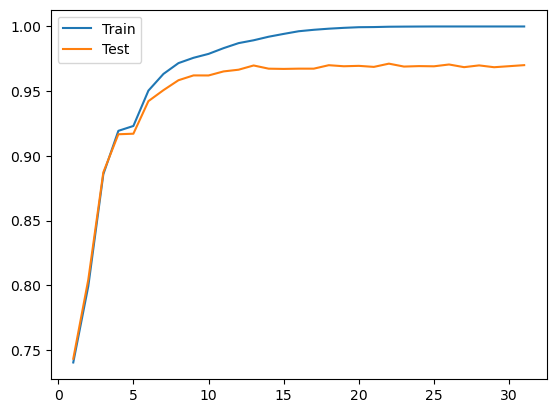

In [26]:
values = [int(x) for x in np.linspace(start=1, stop=31, num=30)] # max_depth
#values = [int(x) for x in np.linspace(start=2, stop=100, num=35)] # min_samples_split
#values = [int(x) for x in np.linspace(start=1, stop=40, num=25)] # min_samples_leaf
#values = ['gini', 'entropy'] # criterion
#values = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)] # n_estimators
#values = ['auto', 'sqrt', 'log2'] #max_features

train_score = []
test_score = []

for x in values :
    model_rf_tunned = RandomForestClassifier(max_depth=x, 
                                             random_state=123)
    model_rf_tunned.fit(X_smote,y_smote)
    
    # eval on train
    y_pred_train_rf = model_rf_tunned.predict(X_train)
    train_rf = fbeta_score(y_train, y_pred_train_rf, pos_label=0, beta=2)
    train_score.append(train_rf)
    
    # eval on test
    y_pred_test_rf = model_rf_tunned.predict(X_test)
    test_rf = fbeta_score(y_test, y_pred_test_rf, pos_label=0, beta=2)
    test_score.append(test_rf)
    
    print('max_depth: ' + str(x) + '; train: ' + str(train_rf) + '; test: ' + str(test_rf))
    
plt.plot(values, train_score, label='Train')
plt.plot(values, test_score, label='Test')
plt.legend()
plt.show()

`max_depth`: 15; train: 0.9941099335755285; test: 0.9703692599810122

min_samples_split: 2; train: 0.9942613966084209; test: 0.9672016399180041
min_samples_split: 4; train: 0.9920226453937212; test: 0.9694259879102763
min_samples_split: 7; train: 0.9899389917585357; test: 0.9689670681125383
min_samples_split: 10; train: 0.9882428388200086; test: 0.9689670681125383
min_samples_split: 13; train: 0.9870836891545687; test: 0.9699665184148717
min_samples_split: 16; train: 0.9860447251621715; test: 0.9684673429613714
min_samples_split: 19; train: 0.9852022431181899; test: 0.9684594621613516
min_samples_split: 22; train: 0.9848872404825852; test: 0.9682499999999999
min_samples_split: 25; train: 0.9834004560080122; test: 0.9680484024201209
min_samples_split: 27; train: 0.9835733765126982; test: 0.9684110561303544
min_samples_split: 30; train: 0.983493077742279; test: 0.9670967096709672
min_samples_split: 33; train: 0.9832435539847127; test: 0.968903109689031
min_samples_split: 36; train: 0.9824927585619356; test: 0.9673548967654851
min_samples_split: 39; train: 

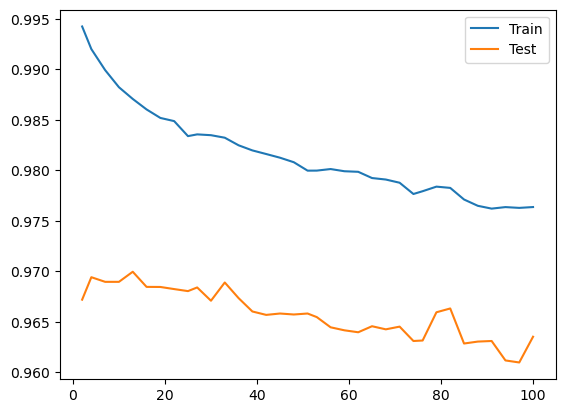

In [27]:
#values = [int(x) for x in np.linspace(start=1, stop=31, num=30)] # max_depth
values = [int(x) for x in np.linspace(start=2, stop=100, num=35)] # min_samples_split
#values = [int(x) for x in np.linspace(start=1, stop=40, num=25)] # min_samples_leaf
#values = ['gini', 'entropy'] # criterion
#values = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)] # n_estimators
#values = ['auto', 'sqrt', 'log2'] #max_features

train_score = []
test_score = []

for x in values :
    model_rf_tunned = RandomForestClassifier(max_depth=15, 
                                             random_state=123,
                                             min_samples_split=x)
    model_rf_tunned.fit(X_smote,y_smote)
    
    # eval on train
    y_pred_train_rf = model_rf_tunned.predict(X_train)
    train_rf = fbeta_score(y_train, y_pred_train_rf, pos_label=0, beta=2)
    train_score.append(train_rf)
    
    # eval on test
    y_pred_test_rf = model_rf_tunned.predict(X_test)
    test_rf = fbeta_score(y_test, y_pred_test_rf, pos_label=0, beta=2)
    test_score.append(test_rf)
    
    print('min_samples_split: ' + str(x) + '; train: ' + str(train_rf) + '; test: ' + str(test_rf))
    
plt.plot(values, train_score, label='Train')
plt.plot(values, test_score, label='Test')
plt.legend()
plt.show()

`min_samples_split`: 7; train: 0.9896613724902606; test: 0.970063471437853

In [28]:
model_rf_tunned = RandomForestClassifier(max_depth=15, 
                                         random_state=123,
                                         min_samples_split=7)
model_rf_tunned.fit(X_smote,y_smote)
    
# eval on train
y_pred_train_rf = model_rf_tunned.predict(X_train)
train_rf = fbeta_score(y_train, y_pred_train_rf, pos_label=0, beta=2)
   
# eval on test
y_pred_test_rf = model_rf_tunned.predict(X_test)
test_rf = fbeta_score(y_test, y_pred_test_rf, pos_label=0, beta=2)

print('F2 Train RF Score :', train_rf)
print('F2 Test RF Score :', test_rf)

F2 Train RF Score : 0.9899389917585357
F2 Test RF Score : 0.9689670681125383


In [29]:
y_train_pred_rf = model_rf_tunned.predict(X_train)
y_test_pred_rf = model_rf_tunned.predict(X_test)

print('TRAINING RESULT:')
print('======================================================')
print('F2 Score:', np.round(fbeta_score(y_train, y_train_pred_rf, pos_label=0, beta=2),3))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_train, y_train_pred_rf))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_train, y_train_pred_rf))

print('\n======================================================')

print('\nTESTING RESULT:')
print('======================================================')
print('F2 Score:', np.round(fbeta_score(y_test, y_test_pred_rf, pos_label=0, beta=2),3))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_test, y_test_pred_rf))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_test, y_test_pred_rf))

TRAINING RESULT:
F2 Score: 0.99
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      9254
           1       0.99      0.54      0.70       969

    accuracy                           0.96     10223
   macro avg       0.97      0.77      0.84     10223
weighted avg       0.96      0.96      0.95     10223

Confussion Matrix ------------------------------------
[[9249    5]
 [ 450  519]]


TESTING RESULT:
F2 Score: 0.969
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.91      0.99      0.94      3932
           1       0.45      0.10      0.16       450

    accuracy                           0.90      4382
   macro avg       0.68      0.54      0.55      4382
weighted avg       0.86      0.90      0.86      4382

Confussion Matrix ------------------------------------
[[3878   54]
 [ 405   45]]


<Axes: >

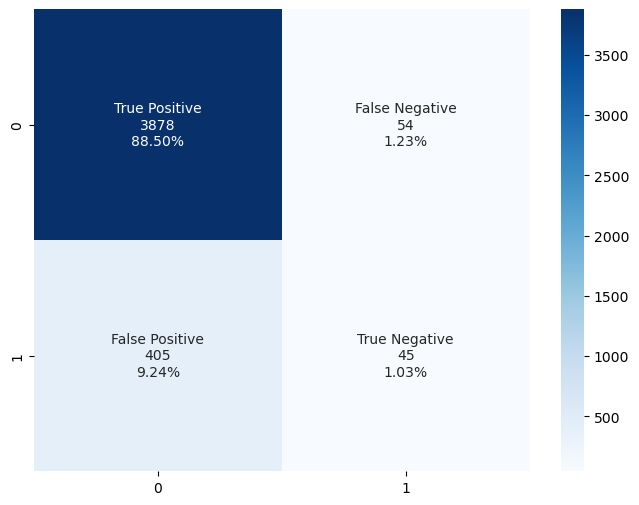

In [57]:
cf_matrix = confusion_matrix(y_test, y_test_pred_rf)

group_names = ["True Positive", "False Negative", "False Positive", "True Negative"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

## Feature Importance

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


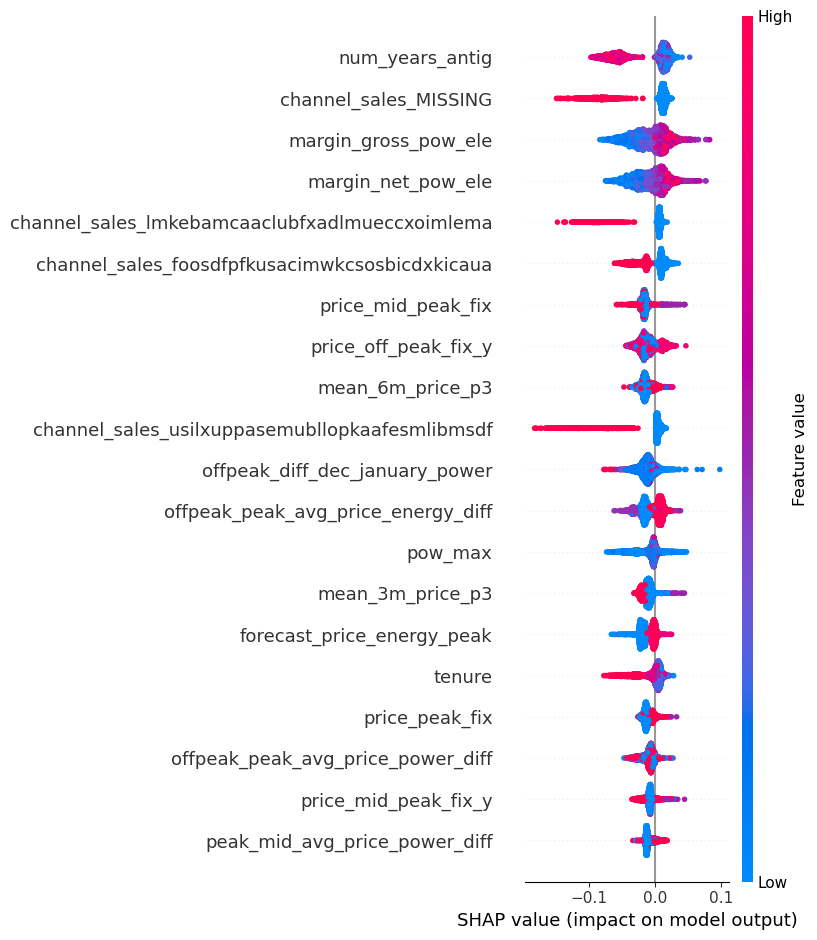

In [30]:
import shap
explainer = shap.TreeExplainer(model_rf_tunned)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test)

In [31]:
df.to_csv('df_cleaned.csv')

## Remodeling

In [32]:
df2 = pd.read_csv('df_cleaned.csv', index_col=0)
df2 = df.iloc[:,:-14] # removing encoded categorical features
df2.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,price_off_peak_var_x,price_peak_var_x,price_mid_peak_var_x,price_off_peak_fix_x,price_peak_fix_x,price_mid_peak_fix_x,price_off_peak_var_y,price_peak_var_y,price_mid_peak_var_y,price_off_peak_fix_y,price_peak_fix_y,price_mid_peak_fix_y,mean_6m_price_p1,mean_6m_price_p2,mean_6m_price_p3,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,offpeak_peak_avg_price_energy_diff,peak_mid_avg_price_energy_diff,off_mid_peak_avg_price_energy_diff,offpeak_peak_avg_price_power_diff,peak_mid_avg_price_power_diff,off_mid_peak_avg_price_power_diff
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,1,0.00,25.44,25.44,2,678.99,3,43.648,0.124787,0.100749,0.066530,40.942265,22.352010,14.901340,0.123598,0.098104,0.061525,41.318559,20.364442,13.576296,41.442157,13.637821,20.462545,0.131756,0.092638,0.036909,42.497907,12.218665,8.145777,42.629663,8.182687,12.311304,1,0.020057,3.700961,0.024038,0.034219,0.058257,18.590255,7.450670,26.040925
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,0,0.00,16.38,16.38,1,18.89,6,13.800,0.149609,0.007124,0.000000,44.311375,0.000000,0.000000,0.147851,0.014247,0.000000,44.355820,0.000000,0.000000,44.503671,0.000000,0.014247,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0,-0.003767,0.177779,0.142485,0.007124,0.149609,44.311375,0.000000,44.311375
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,0,0.00,28.60,28.60,1,6.60,6,13.856,0.170512,0.088421,0.000000,44.385450,0.000000,0.000000,0.168569,0.088535,0.000000,44.444710,0.000000,0.000000,44.613279,0.000000,0.088535,0.167798,0.088409,0.000000,44.444710,0.000000,0.000000,44.612508,0.000000,0.088409,0,-0.004670,0.177779,0.082090,0.088421,0.170512,44.385450,0.000000,44.385450
3,bba03439a292a1e166f80264c16191cb,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,0,0.00,30.22,30.22,1,25.46,6,13.200,0.151210,0.000000,0.000000,44.400265,0.000000,0.000000,0.149330,0.000000,0.000000,44.444710,0.000000,0.000000,44.594040,0.000000,0.000000,0.148586,0.000000,0.000000,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000,0,-0.004547,0.177779,0.151210,0.000000,0.151210,44.400265,0.000000,44.400265
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,0,52.32,44.91,44.91,1,47.98,6,19.800,0.124174,0.103638,0.072865,40.688156,24.412893,16.275263,0.121266,0.102368,0.073728,40.728885,24.437330,16.291555,40.850151,16.365283,24.539698,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555,40.848791,16.365274,24.539003,0,-0.006192,0.162916,0.020536,0.030773,0.051309,16.275263,8.137629,24.412893


In [33]:
df.shape

(14605, 66)

In [34]:
df2.shape

(14605, 52)

In [35]:
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,price_off_peak_var_x,price_peak_var_x,price_mid_peak_var_x,price_off_peak_fix_x,price_peak_fix_x,price_mid_peak_fix_x,price_off_peak_var_y,price_peak_var_y,price_mid_peak_var_y,price_off_peak_fix_y,price_peak_fix_y,price_mid_peak_fix_y,mean_6m_price_p1,mean_6m_price_p2,mean_6m_price_p3,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,offpeak_peak_avg_price_energy_diff,peak_mid_avg_price_energy_diff,off_mid_peak_avg_price_energy_diff,offpeak_peak_avg_price_power_diff,peak_mid_avg_price_power_diff,off_mid_peak_avg_price_power_diff,tenure,months_activ,months_to_end,months_modif_prod,months_renewal,has_gas,channel_sales_MISSING,channel_sales_epumfxlbckeskwekxbiuasklxalciiuu,channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci,channel_sales_fixdbufsefwooaasfcxdxadsiekoceaa,channel_sales_foosdfpfkusacimwkcsosbicdxkicaua,channel_sales_lmkebamcaaclubfxadlmueccxoimlema,channel_sales_sddiedcslfslkckwlfkdpoeeailfpeds,channel_sales_usilxuppasemubllopkaafesmlibmsdf
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,1,0.00,25.44,25.44,2,678.99,3,43.648,0.124787,0.100749,0.066530,40.942265,22.352010,14.901340,0.123598,0.098104,0.061525,41.318559,20.364442,13.576296,41.442157,13.637821,20.462545,0.131756,0.092638,0.036909,42.497907,12.218665,8.145777,42.629663,8.182687,12.311304,1,0.020057,3.700961,0.024038,0.034219,0.058257,18.590255,7.450670,26.040925,3,30,5,2,6,1,0,0,0,0,1,0,0,0
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,0,0.00,16.38,16.38,1,18.89,6,13.800,0.149609,0.007124,0.000000,44.311375,0.000000,0.000000,0.147851,0.014247,0.000000,44.355820,0.000000,0.000000,44.503671,0.000000,0.014247,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0,-0.003767,0.177779,0.142485,0.007124,0.149609,44.311375,0.000000,44.311375,7,76,7,76,4,0,1,0,0,0,0,0,0,0
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,0,0.00,28.60,28.60,1,6.60,6,13.856,0.170512,0.088421,0.000000,44.385450,0.000000,0.000000,0.168569,0.088535,0.000000,44.444710,0.000000,0.000000,44.613279,0.000000,0.088535,0.167798,0.088409,0.000000,44.444710,0.000000,0.000000,44.612508,0.000000,0.088409,0,-0.004670,0.177779,0.082090,0.088421,0.170512,44.385450,0.000000,44.385450,6,68,3,68,8,0,0,0,0,0,1,0,0,0
3,bba03439a292a1e166f80264c16191cb,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,0,0.00,30.22,30.22,1,25.46,6,13.200,0.151210,0.000000,0.000000,44.400265,0.000000,0.000000,0.149330,0.000000,0.000000,44.444710,0.000000,0.000000,44.594040,0.000000,0.000000,0.148586,0.000000,0.000000,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000,0,-0.004547,0.177779,0.151210,0.000000,0.151210,44.400265,0.000000,44.400265,6,69,2,69,9,0,0,0,0,0,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,0,52.32,44.91,44.91,1,47.98,6,19.800,0.124174,0.103638,0.072865,40.688156,24.412893,16.275263,0.121266,0.102368,0.073728,40.728885,24.437330,16.291555,40.850151,16.365283,24.539698,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555,40.848791,16.365274,24.539003,0,-0.006192,0.162916,0.020536,0.030773,0.051309,16.275263,8.137629,24.412893,6,71,2,71,9,0,1,0,0,0,0,0,0,0


In [36]:
from sklearn.model_selection import train_test_split

# let's separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(df2.drop(['churn','id'], axis=1),
                                                    df2['churn'],
                                                    test_size=0.3,
                                                    random_state=123)

X_train.shape, X_test.shape

((10223, 50), (4382, 50))

In [37]:
#from imblearn.over_sampling import SMOTE

# Random Over Sampling
sm = SMOTE(random_state=0)
sm.fit(X_train, y_train)
X_smote, y_smote = sm.fit_resample(X_train, y_train)

In [38]:
lr_sm = LogisticRegression()
dt_sm = DecisionTreeClassifier()
rf_sm = RandomForestClassifier()
ab_sm = AdaBoostClassifier()
gb_sm = GradientBoostingClassifier()
#xg_sm = XGBClassifier()


# Train the Model
lr_sm.fit(X_smote, y_smote)
dt_sm.fit(X_smote, y_smote)
rf_sm.fit(X_smote, y_smote)
ab_sm.fit(X_smote, y_smote)
gb_sm.fit(X_smote, y_smote)
#xg_sm.fit(X_smote, y_smote)

# Predictions for the X test
y_pred_lr_sm = lr_sm.predict(X_test)
y_pred_dt_sm = dt_sm.predict(X_test)
y_pred_rf_sm = rf_sm.predict(X_test)
y_pred_ab_sm = lr_sm.predict(X_test)
y_pred_gb_sm = gb_sm.predict(X_test)
#y_pred_xg_sm = xg_sm.predict(X_test)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [40]:
list = [['Logistic Regression', accuracy_score(y_test, y_pred_lr_sm), precision_score(y_test, y_pred_lr_sm),
          recall_score(y_test, y_pred_lr_sm), f1_score(y_test, y_pred_lr_sm), fbeta_score(y_test, y_pred_lr_sm, pos_label=0,  beta=2)],
        ['Decision Tree', accuracy_score(y_test, y_pred_dt_sm), precision_score(y_test, y_pred_dt_sm),
          recall_score(y_test, y_pred_dt_sm), f1_score(y_test, y_pred_dt_sm), fbeta_score(y_test, y_pred_dt_sm, pos_label=0, beta=2)],
        ['Random Forest', accuracy_score(y_test, y_pred_rf_sm), precision_score(y_test, y_pred_rf_sm),
          recall_score(y_test, y_pred_rf_sm), f1_score(y_test, y_pred_rf_sm), fbeta_score(y_test, y_pred_rf_sm, pos_label=0, beta=2)],
        ['Ada Boost', accuracy_score(y_test, y_pred_ab_sm), precision_score(y_test, y_pred_ab_sm),
          recall_score(y_test, y_pred_ab_sm), f1_score(y_test, y_pred_ab_sm), fbeta_score(y_test, y_pred_ab_sm, pos_label=0, beta=2)],
        ['Gradient Boost', accuracy_score(y_test, y_pred_gb_sm), precision_score(y_test, y_pred_gb_sm),
          recall_score(y_test, y_pred_gb_sm), f1_score(y_test, y_pred_gb_sm), fbeta_score(y_test, y_pred_gb_sm, pos_label=0, beta=2)],
        #['XG Boost', accuracy_score(y_test, y_pred_xg_sm), precision_score(y_test, y_pred_xg_sm),
          #recall_score(y_test, y_pred_xg_sm), f1_score(y_test, y_pred_xg_sm), fbeta_score(y_test, y_pred_gb_sm, pos_label=0, beta=2)]
       ]

df2_score = pd.DataFrame(list,columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'],dtype=float)
df2_score

Could not cast to float64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised.


,Model,Accuracy,Precision,Recall,F1 Score,F2 Score
0,Logistic Regression,0.631447,0.130628,0.457778,0.203256,0.690930
1,Decision Tree,0.803058,0.178849,0.255556,0.210430,0.874300
2,Random Forest,0.892971,0.420168,0.111111,0.175747,0.966185
3,Ada Boost,0.631447,0.130628,0.457778,0.203256,0.690930
4,Gradient Boost,0.871748,0.252212,0.126667,0.168639,0.946238


max_depth: 1; train: 0.6638793282668454; test: 0.670189701897019
max_depth: 2; train: 0.7818242940385478; test: 0.7903725892059489
max_depth: 3; train: 0.9341308363042826; test: 0.9336528758829467
max_depth: 4; train: 0.9508992536515471; test: 0.9455176577120434
max_depth: 5; train: 0.9608370128623536; test: 0.9523331660812846
max_depth: 6; train: 0.9652563146115315; test: 0.9538615847542627
max_depth: 7; train: 0.9694877695389074; test: 0.9576441102756892
max_depth: 8; train: 0.9685059531430035; test: 0.9536832597350464
max_depth: 9; train: 0.9759033577637634; test: 0.9619429143715572
max_depth: 10; train: 0.9787846481876333; test: 0.9608255685803027
max_depth: 11; train: 0.982200025611474; test: 0.9625976366913678
max_depth: 12; train: 0.985555864190936; test: 0.965579347608565
max_depth: 13; train: 0.9883969857852372; test: 0.9646664331114558
max_depth: 14; train: 0.9915059737028379; test: 0.9667333666833416
max_depth: 15; train: 0.9938315386764676; test: 0.9649649649649651
max_dept

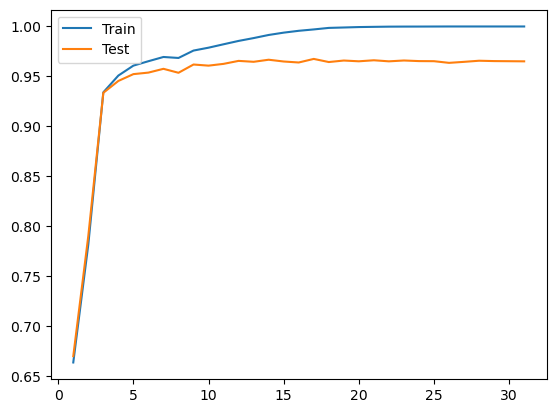

In [41]:
values = [int(x) for x in np.linspace(start=1, stop=31, num=30)] # max_depth
#values = [int(x) for x in np.linspace(start=2, stop=100, num=35)] # min_samples_split
#values = [int(x) for x in np.linspace(start=1, stop=40, num=25)] # min_samples_leaf
#values = ['gini', 'entropy'] # criterion
#values = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)] # n_estimators
#values = ['auto', 'sqrt', 'log2'] #max_features

train_score = []
test_score = []

for x in values :
    model_rf_tunned = RandomForestClassifier(max_depth=x, 
                                             random_state=123)
    model_rf_tunned.fit(X_smote,y_smote)
    
    # eval on train
    y_pred_train_rf = model_rf_tunned.predict(X_train)
    train_rf = fbeta_score(y_train, y_pred_train_rf, pos_label=0, beta=2)
    train_score.append(train_rf)
    
    # eval on test
    y_pred_test_rf = model_rf_tunned.predict(X_test)
    test_rf = fbeta_score(y_test, y_pred_test_rf, pos_label=0, beta=2)
    test_score.append(test_rf)
    
    print('max_depth: ' + str(x) + '; train: ' + str(train_rf) + '; test: ' + str(test_rf))
    
plt.plot(values, train_score, label='Train')
plt.plot(values, test_score, label='Test')
plt.legend()
plt.show()

`max_depth`: 14; train: 0.9920405054600847; test: 0.9689437887577517

min_samples_split: 2; train: 0.9915059737028379; test: 0.9667333666833416
min_samples_split: 4; train: 0.9902305253235069; test: 0.9642624755993794
min_samples_split: 7; train: 0.9878325207424514; test: 0.9651186067460713
min_samples_split: 10; train: 0.9863516948247506; test: 0.9659744808606455
min_samples_split: 13; train: 0.9860613046448087; test: 0.9640122128234646
min_samples_split: 16; train: 0.9839336007510456; test: 0.9628479871820548
min_samples_split: 19; train: 0.9836187957255296; test: 0.9634060873047656
min_samples_split: 22; train: 0.9831730256563372; test: 0.9636563876651981
min_samples_split: 25; train: 0.9827766290793597; test: 0.9613843534007811
min_samples_split: 27; train: 0.9815166179887862; test: 0.960623215269776
min_samples_split: 30; train: 0.981368180946087; test: 0.9619815668202766
min_samples_split: 33; train: 0.9806220554690996; test: 0.9620392628205128
min_samples_split: 36; train: 0.9801351322548331; test: 0.9615288283324148
min_samples_split: 39; train: 

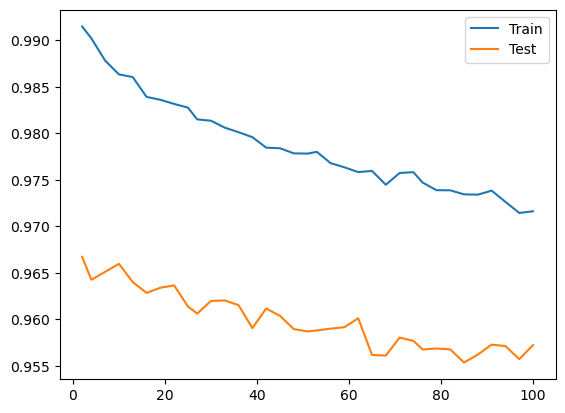

In [42]:
#values = [int(x) for x in np.linspace(start=1, stop=31, num=30)] # max_depth
values = [int(x) for x in np.linspace(start=2, stop=100, num=35)] # min_samples_split
#values = [int(x) for x in np.linspace(start=1, stop=40, num=25)] # min_samples_leaf
#values = ['gini', 'entropy'] # criterion
#values = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)] # n_estimators
#values = ['auto', 'sqrt', 'log2'] #max_features

train_score = []
test_score = []

for x in values :
    model_rf_tunned = RandomForestClassifier(max_depth=14, 
                                             random_state=123,
                                             min_samples_split=x)
    model_rf_tunned.fit(X_smote,y_smote)
    
    # eval on train
    y_pred_train_rf = model_rf_tunned.predict(X_train)
    train_rf = fbeta_score(y_train, y_pred_train_rf, pos_label=0, beta=2)
    train_score.append(train_rf)
    
    # eval on test
    y_pred_test_rf = model_rf_tunned.predict(X_test)
    test_rf = fbeta_score(y_test, y_pred_test_rf, pos_label=0, beta=2)
    test_score.append(test_rf)
    
    print('min_samples_split: ' + str(x) + '; train: ' + str(train_rf) + '; test: ' + str(test_rf))
    
plt.plot(values, train_score, label='Train')
plt.plot(values, test_score, label='Test')
plt.legend()
plt.show()

`min_samples_split`: 45; train: 0.9797549280767182; test: 0.9630019024732152

min_samples_leaf: 1; train: 0.9784068381898408; test: 0.9603826505058598
min_samples_leaf: 2; train: 0.9780709231949534; test: 0.9592644553562482
min_samples_leaf: 4; train: 0.9767873129556209; test: 0.9569186017352926
min_samples_leaf: 5; train: 0.975656548431105; test: 0.9586466165413534
min_samples_leaf: 7; train: 0.9751209840748716; test: 0.9586466165413534
min_samples_leaf: 9; train: 0.9752354972081326; test: 0.9595529270248597
min_samples_leaf: 10; train: 0.9745256874866767; test: 0.9601022505137586
min_samples_leaf: 12; train: 0.9735966558607746; test: 0.9592921241289417
min_samples_leaf: 14; train: 0.9723347980034982; test: 0.95579750137976
min_samples_leaf: 15; train: 0.9726813247744769; test: 0.9577295291581006
min_samples_leaf: 17; train: 0.9711854284861152; test: 0.9567049616214319
min_samples_leaf: 18; train: 0.9708800000000001; test: 0.9558934216468463
min_samples_leaf: 20; train: 0.9696413713651783; test: 0.9574308062575212
min_samples_leaf: 22; train: 0.9698689769962868

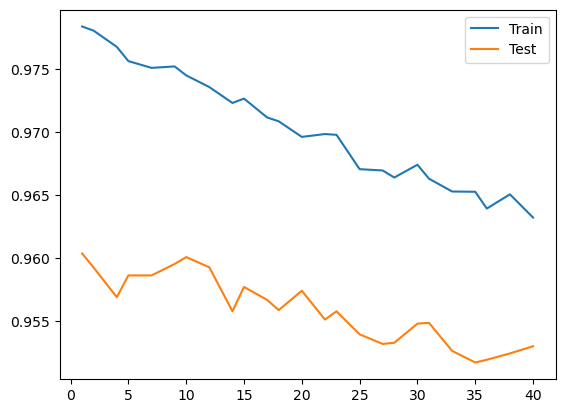

In [43]:
#values = [int(x) for x in np.linspace(start=1, stop=31, num=30)] # max_depth
#values = [int(x) for x in np.linspace(start=2, stop=100, num=35)] # min_samples_split
values = [int(x) for x in np.linspace(start=1, stop=40, num=25)] # min_samples_leaf
#values = ['gini', 'entropy'] # criterion
#values = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)] # n_estimators
#values = ['auto', 'sqrt', 'log2'] #max_features

train_score = []
test_score = []

for x in values :
    model_rf_tunned = RandomForestClassifier(max_depth=14, 
                                             random_state=123,
                                             min_samples_split=45,
                                             min_samples_leaf=x)
    model_rf_tunned.fit(X_smote,y_smote)
    
    # eval on train
    y_pred_train_rf = model_rf_tunned.predict(X_train)
    train_rf = fbeta_score(y_train, y_pred_train_rf, pos_label=0, beta=2)
    train_score.append(train_rf)
    
    # eval on test
    y_pred_test_rf = model_rf_tunned.predict(X_test)
    test_rf = fbeta_score(y_test, y_pred_test_rf, pos_label=0, beta=2)
    test_score.append(test_rf)
    
    print('min_samples_leaf: ' + str(x) + '; train: ' + str(train_rf) + '; test: ' + str(test_rf))
    
plt.plot(values, train_score, label='Train')
plt.plot(values, test_score, label='Test')
plt.legend()
plt.show()

`min_samples_leaf`: 5; train: 0.9779714097019534; test: 0.9647147147147148

In [44]:
model_rf_tunned = RandomForestClassifier(max_depth=14, 
                                             random_state=123,
                                             min_samples_split=45,
                                             min_samples_leaf=5)
model_rf_tunned.fit(X_smote,y_smote)
    
# eval on train
y_pred_train_rf = model_rf_tunned.predict(X_train)
train_rf = fbeta_score(y_train, y_pred_train_rf, pos_label=0, beta=2)
   
# eval on test
y_pred_test_rf = model_rf_tunned.predict(X_test)
test_rf = fbeta_score(y_test, y_pred_test_rf, pos_label=0, beta=2)
 
print('F2 Train RF Score :', train_rf)
print('F2 Test RF Score :', test_rf)

F2 Train RF Score : 0.975656548431105
F2 Test RF Score : 0.9586466165413534


In [45]:
y_train_pred_rf = model_rf_tunned.predict(X_train)
y_test_pred_rf = model_rf_tunned.predict(X_test)

print('TRAINING RESULT:')
print('======================================================')
print('F2 Score:', np.round(fbeta_score(y_train, y_train_pred_rf, pos_label=0, beta=2),3))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_train, y_train_pred_rf))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_train, y_train_pred_rf))

print('\n======================================================')

print('\nTESTING RESULT:')
print('======================================================')
print('F2 Score:', np.round(fbeta_score(y_test, y_test_pred_rf, pos_label=0, beta=2),3))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_test, y_test_pred_rf))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_test, y_test_pred_rf))

TRAINING RESULT:
F2 Score: 0.976
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      9254
           1       0.69      0.23      0.35       969

    accuracy                           0.92     10223
   macro avg       0.81      0.61      0.65     10223
weighted avg       0.90      0.92      0.90     10223

Confussion Matrix ------------------------------------
[[9154  100]
 [ 742  227]]


TESTING RESULT:
F2 Score: 0.959
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      3932
           1       0.33      0.12      0.17       450

    accuracy                           0.88      4382
   macro avg       0.62      0.55      0.56      4382
weighted avg       0.85      0.88      0.86      4382

Confussion Matrix ------------------------------------
[[3825  107]
 [ 397   53]]


In [65]:
print("Precision Score is - ", precision_score(y_test, y_test_pred_rf))

Precision Score is -  0.33125


<Axes: >

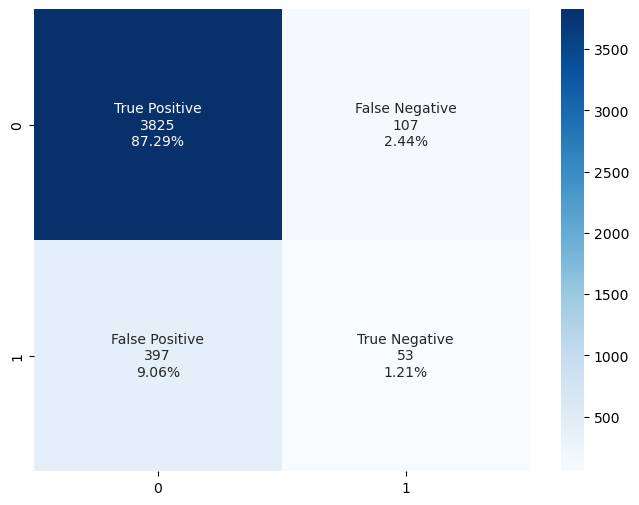

In [46]:
cf_matrix = confusion_matrix(y_test, y_test_pred_rf)

group_names = ["True Positive", "False Negative", "False Positive", "True Negative"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


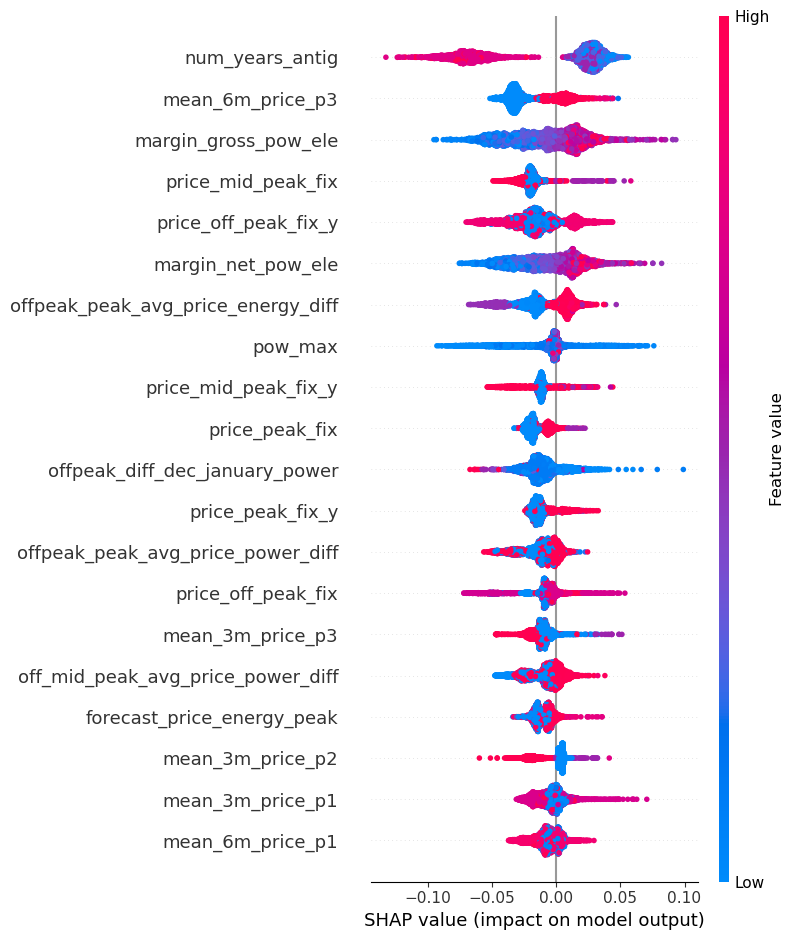

In [47]:
explainer = shap.TreeExplainer(model_rf_tunned)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test)

* Top drivers of client churn are antiquity of the client, tenure, and difference off peak - peak in energy price
* If the client have low years of antiquity, the probability of client churn will be high
* New clients have higher probability to churn than old clients.
* When off-peak is very much more expensive than peak, the probabilty of clients churn will be high
* Also, price off peak power and price peak power have high contribution as predictors. Generaly, higher prices drive clients to churn

In [48]:
X_test.head()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,price_off_peak_var_x,price_peak_var_x,price_mid_peak_var_x,price_off_peak_fix_x,price_peak_fix_x,price_mid_peak_fix_x,price_off_peak_var_y,price_peak_var_y,price_mid_peak_var_y,price_off_peak_fix_y,price_peak_fix_y,price_mid_peak_fix_y,mean_6m_price_p1,mean_6m_price_p2,mean_6m_price_p3,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,offpeak_peak_avg_price_energy_diff,peak_mid_avg_price_energy_diff,off_mid_peak_avg_price_energy_diff,offpeak_peak_avg_price_power_diff,peak_mid_avg_price_power_diff,off_mid_peak_avg_price_power_diff
9120,1965,3500,154,297.43,154,0.0,13.74,0.146694,0.000000,44.311378,1,22.88,23.76,23.76,2,31.06,6,10.392,0.151265,0.000000,0.000000,44.444710,0.000000,0.000000,0.149330,0.000000,0.000000,44.444710,0.000000,0.000000,44.594040,0.000000,0.000000,0.148586,0.000000,0.000000,44.444710,0.00000,0.000000,44.593296,0.000000,0.000000,-0.004573,0.000000,0.151265,0.000000,0.151265,44.444710,0.000000,44.444710
4238,20843,5753,1722,2093.30,1722,0.0,130.08,0.115174,0.098837,40.606701,1,171.99,16.44,16.44,3,230.77,5,26.300,0.122696,0.102080,0.072525,40.620275,24.372163,16.248109,0.119415,0.100764,0.073514,40.674581,24.404746,16.269831,40.793996,16.343345,24.505510,0.118175,0.100491,0.074516,40.728885,24.43733,16.291555,40.847060,16.366071,24.537821,-0.007801,0.162916,0.020616,0.029555,0.050171,16.248112,8.124054,24.372166
1288,58947,0,9319,8753.16,9319,0.0,19.80,0.145789,0.000000,44.311378,0,1374.50,8.76,8.76,1,808.57,4,13.150,0.148523,0.000000,0.000000,44.444710,0.000000,0.000000,0.147132,0.000000,0.000000,44.444710,0.000000,0.000000,44.591842,0.000000,0.000000,0.147678,0.000000,0.000000,44.444710,0.00000,0.000000,44.592388,0.000000,0.000000,-0.002237,0.000000,0.148523,0.000000,0.148523,44.444710,0.000000,44.444710
5266,1761,0,119,106.18,61,0.0,16.79,0.144902,0.000000,44.311378,0,8.95,12.36,12.36,1,9.45,4,10.392,0.149005,0.007124,0.000000,44.355820,0.000000,0.000000,0.147532,0.000000,0.000000,44.444710,0.000000,0.000000,44.592242,0.000000,0.000000,0.146788,0.000000,0.000000,44.444710,0.00000,0.000000,44.591498,0.000000,0.000000,-0.004579,0.177779,0.141881,0.007124,0.149005,44.355820,0.000000,44.355820
9951,8348,0,2340,808.78,2340,0.0,16.65,0.164057,0.086803,44.311378,0,221.15,19.11,19.11,1,85.97,4,10.350,0.167594,0.086025,0.000000,44.370635,0.000000,0.000000,0.166827,0.087435,0.000000,44.444710,0.000000,0.000000,44.611537,0.000000,0.087435,0.166056,0.087310,0.000000,44.444710,0.00000,0.000000,44.610766,0.000000,0.087310,-0.001839,0.177779,0.081569,0.086025,0.167594,44.370635,0.000000,44.370635


In [49]:
client_churn_proba = model_rf_tunned.predict_proba(X_test)[:,1]
client_churn_proba

array([0.13195673, 0.15181787, 0.15969421, ..., 0.14334301, 0.0975729 ,
       0.14474767])

In [50]:
client_churn_proba.tolist()

[0.13195672641588804,
 0.15181787020970072,
 0.15969420995241682,
 0.25091253749680315,
 0.23939006715193994,
 0.5144937588336818,
 0.2260829912541689,
 0.2676374060579979,
 0.10750216176902073,
 0.19841327726154567,
 0.28945758785222736,
 0.273848463323672,
 0.1624240398281248,
 0.21197795230870745,
 0.1350316759617932,
 0.19436746785203707,
 0.11647826106558071,
 0.061990354272277066,
 0.1965925096923866,
 0.38807655146262965,
 0.3112892616942504,
 0.19863669102479975,
 0.24469870243915126,
 0.1695518538499619,
 0.19057917607317174,
 0.0652369027810191,
 0.11802503344939144,
 0.21896055030043068,
 0.14184084491288634,
 0.17903797823496692,
 0.04733315473203146,
 0.15894554548941092,
 0.32363554186544646,
 0.10914916887041835,
 0.09447480986599821,
 0.11227174354613498,
 0.16355199647473256,
 0.2428259011503109,
 0.6503252581086744,
 0.2452549824188529,
 0.11391083150651612,
 0.2608645806945086,
 0.3233089126216835,
 0.28174037676109476,
 0.16218760315443842,
 0.09519546572894817,
 0.

In [51]:
df2.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,price_off_peak_var_x,price_peak_var_x,price_mid_peak_var_x,price_off_peak_fix_x,price_peak_fix_x,price_mid_peak_fix_x,price_off_peak_var_y,price_peak_var_y,price_mid_peak_var_y,price_off_peak_fix_y,price_peak_fix_y,price_mid_peak_fix_y,mean_6m_price_p1,mean_6m_price_p2,mean_6m_price_p3,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,offpeak_peak_avg_price_energy_diff,peak_mid_avg_price_energy_diff,off_mid_peak_avg_price_energy_diff,offpeak_peak_avg_price_power_diff,peak_mid_avg_price_power_diff,off_mid_peak_avg_price_power_diff
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,1,0.00,25.44,25.44,2,678.99,3,43.648,0.124787,0.100749,0.066530,40.942265,22.352010,14.901340,0.123598,0.098104,0.061525,41.318559,20.364442,13.576296,41.442157,13.637821,20.462545,0.131756,0.092638,0.036909,42.497907,12.218665,8.145777,42.629663,8.182687,12.311304,1,0.020057,3.700961,0.024038,0.034219,0.058257,18.590255,7.450670,26.040925
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,0,0.00,16.38,16.38,1,18.89,6,13.800,0.149609,0.007124,0.000000,44.311375,0.000000,0.000000,0.147851,0.014247,0.000000,44.355820,0.000000,0.000000,44.503671,0.000000,0.014247,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0,-0.003767,0.177779,0.142485,0.007124,0.149609,44.311375,0.000000,44.311375
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,0,0.00,28.60,28.60,1,6.60,6,13.856,0.170512,0.088421,0.000000,44.385450,0.000000,0.000000,0.168569,0.088535,0.000000,44.444710,0.000000,0.000000,44.613279,0.000000,0.088535,0.167798,0.088409,0.000000,44.444710,0.000000,0.000000,44.612508,0.000000,0.088409,0,-0.004670,0.177779,0.082090,0.088421,0.170512,44.385450,0.000000,44.385450
3,bba03439a292a1e166f80264c16191cb,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,0,0.00,30.22,30.22,1,25.46,6,13.200,0.151210,0.000000,0.000000,44.400265,0.000000,0.000000,0.149330,0.000000,0.000000,44.444710,0.000000,0.000000,44.594040,0.000000,0.000000,0.148586,0.000000,0.000000,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000,0,-0.004547,0.177779,0.151210,0.000000,0.151210,44.400265,0.000000,44.400265
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,0,52.32,44.91,44.91,1,47.98,6,19.800,0.124174,0.103638,0.072865,40.688156,24.412893,16.275263,0.121266,0.102368,0.073728,40.728885,24.437330,16.291555,40.850151,16.365283,24.539698,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555,40.848791,16.365274,24.539003,0,-0.006192,0.162916,0.020536,0.030773,0.051309,16.275263,8.137629,24.412893


In [53]:
proba_predictions = model_rf_tunned.predict_proba(X_test)
probabilities = proba_predictions[:, 1]

In [52]:
X_test = X_test.reset_index()
X_test.drop(columns='index', inplace=True)

In [54]:
X_test['churn'] = y_pred_test_rf.tolist()
X_test['churn_probability'] = probabilities.tolist()
X_test.to_csv('X_test_with_churn_proba.csv')

# Business impact of discount

The SME division head proposed that we give a 20% discount to high propensity to churn customers. We can assume to start that everyone who is offered a discount will accept it.

Our task is to calculate the forecast revenue for the set of customers:

1. When no discount is offered
2. And when a discount is offered based on a probability cutoff to decide who should receive the 20% discount

And hence to decide where the cut-off should be set in order to maximise revenue

## Calculate a baseline revenue estimate (no intervention)

Calculate a baseline estimate of the electricity revenue for every customer for the next twelve months based on the forecast consumption and forecast
price and actual churn outcome. Call this `basecase_revenue`.

- For customers who end up churning, we should reduce our forecast revenue calculation by 91.9% to account for the customers churn some time between January 2016 and the start of March 2016. (Not knowing when they churn, a reasonable assumption for the lost revenue is the average of 100%, corresponding to churn on 1 January 2016, and 83.9%, corresponding to churn at the end of February, or 59 days into a 365 day year). Call this new variable `basecase_revenue_after_churn`, ie `basecase_revenue_after_churn` = `basecase_revenue`*(1 -0.919 * `churn`)

In [55]:
test_df = X_test.copy()

In [56]:
# Electricity revenue for each customer consists of energy consumption (amount * price) and the meter rent
# (the power price may also play a role, but we will ignore it for now since we need to ask the client for more data)
# Note that we need to reverse the log10-transformation from the data cleaning step
test_df['basecase_revenue'] = (test_df['forecast_cons_12m']) * test_df['forecast_price_energy_off_peak'] + test_df['forecast_meter_rent_12m']

# Taking churn into account
test_df['basecase_revenue_after_churn'] = test_df['basecase_revenue'] * (1 - 0.919 * test_df['churn'])

In [57]:
test_df.sample(4)

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,price_off_peak_var_x,price_peak_var_x,price_mid_peak_var_x,price_off_peak_fix_x,price_peak_fix_x,price_mid_peak_fix_x,price_off_peak_var_y,price_peak_var_y,price_mid_peak_var_y,price_off_peak_fix_y,price_peak_fix_y,price_mid_peak_fix_y,mean_6m_price_p1,mean_6m_price_p2,mean_6m_price_p3,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,offpeak_peak_avg_price_energy_diff,peak_mid_avg_price_energy_diff,off_mid_peak_avg_price_energy_diff,offpeak_peak_avg_price_power_diff,peak_mid_avg_price_power_diff,off_mid_peak_avg_price_power_diff,churn,churn_probability,basecase_revenue,basecase_revenue_after_churn
212,1500,0,0,124.41,0,0.0,132.20,0.092453,0.086393,59.173468,0,0.00,0.00,0.00,1,5.28,7,15.0,0.104044,0.092514,0.065678,59.173468,36.490689,8.367731,0.101630,0.091216,0.065678,59.173468,36.490689,8.367731,59.275098,8.433409,36.581905,0.100664,0.090697,0.065678,59.173468,36.490689,8.367731,59.274132,8.433409,36.581386,-0.005795,0.000000,0.011530,0.026836,0.038366,22.682779,28.122958,50.805737,0,0.008581,143.702078,143.702078
2225,68980,0,3805,2333.11,1641,0.0,145.79,0.114593,0.097704,40.606701,0,153.88,44.88,44.88,1,241.78,6,30.0,0.123754,0.103281,0.072903,40.565972,24.339579,16.226385,0.120382,0.101570,0.073055,40.565973,24.339578,16.226383,40.686355,16.299438,24.441148,0.118258,0.100107,0.072272,40.565973,24.339578,16.226383,40.684232,16.298655,24.439685,-0.007828,0.000004,0.020473,0.030378,0.050851,16.226392,8.113194,24.339586,0,0.163613,413.148074,413.148074
1433,1971,0,184,198.43,184,0.0,131.04,0.116509,0.101397,41.271364,0,17.82,32.40,32.40,1,25.93,6,17.3,0.127632,0.107159,0.076933,40.565971,24.339579,16.226386,0.124231,0.105422,0.076910,40.565973,24.339578,16.226383,40.690204,16.303293,24.445000,0.122871,0.104727,0.076901,40.565973,24.339578,16.226383,40.688844,16.303284,24.444305,-0.008161,0.000004,0.020473,0.030226,0.050699,16.226392,8.113194,24.339585,0,0.169226,154.158881,154.158881
4097,10838,6466,164,1158.69,0,0.0,19.25,0.145310,0.000000,44.311378,1,0.00,33.12,33.12,3,108.80,7,13.2,0.149602,0.000000,0.000000,44.266930,0.000000,0.000000,0.147917,0.000000,0.000000,44.266930,0.000000,0.000000,44.414847,0.000000,0.000000,0.147173,0.000000,0.000000,44.266930,0.000000,0.000000,44.414103,0.000000,0.000000,-0.003418,-0.000001,0.149602,0.000000,0.149602,44.266930,0.000000,44.266930,0,0.107117,187.619244,187.619244


## Calculate the estimated benefits and costs of intervention

Now, pick a cut-off probability (eg 0.5) so that:

- Customers with a higher churn probability than the cut-off get a discount, and
- Customers below the churn-probability do not get a discount.

From this, calculate the revenue of the intervention scenario assuming:
- All customers who are offered a discount accept it
- Customers who do receive a discount are are assumed not to churn in the next twelve months (ie churn probability = 0), and therefore the retained
revenue is 0.8*`basecase_revenue` , being (1-`discount_fraction`)*`basecase_revenue`
- Customers who do not receive a discount are assumed to churn based on the observed dependent variable (ie, a 1 or 0 for whether they actually
churned or not).

Now, map out the revenue delta as a function of the cut-off probability in a graph. What cut-off probability approximately optimises the revenue outcome? Assume for these calculations that the customer does not consume more or less electricity because the price changes. In practice, we would expect that if the customer's cost goes down then their consumption might increase. We will see two counterbalancing effects at play:

- For true positives we will see revenue retention vs the no-discount scenario
- For false positives we will see reduced revenue from giving them a discount when they wouldn't in fact churn.

(False negatives represent an opportunity cost but not an actual cost difference between the two scenarios.)

The optimal cut-off point will balance the benefits from true positives against the costs of false positives. Our task is to approximately find the optimal cut-off point. We may need to make additional assumptions. If we feel the assumptions above aren't justified and that others are better then we should modify our assumptions.

In [58]:
def get_rev_delta(pred: pd.DataFrame, cutoff: float=0.5, discount: float=0.2) -> float:
    """
    Get the delta of revenues for offering discount for all customers with predicted churn risk >= cutoff
    """
    pred['discount_revenue'] = pred['basecase_revenue_after_churn']
    # Churn predicted => discount is given => customer stays for full year, independent of whether the prediction
    # (false positive, "free"/unnecessary discount given) or correct
    pred.loc[pred['churn_probability'] >= cutoff, 'discount_revenue'] = pred['basecase_revenue'] * (1 - discount)
    # Save the revenue delta for each customer in a separate column
    pred['revenue_delta'] = pred['discount_revenue'] - pred['basecase_revenue_after_churn']
    return pred['revenue_delta'].sum()

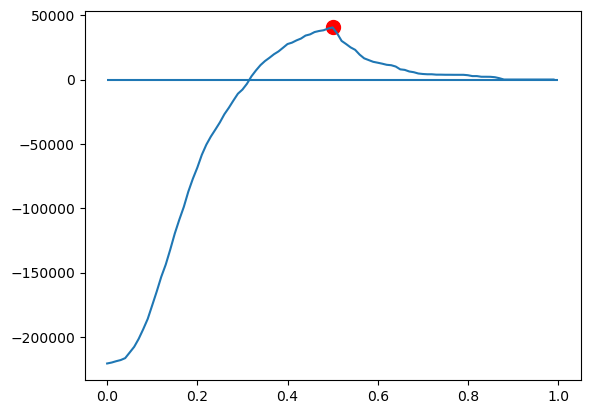

Maximum benefit at cutoff 0.5 with revenue delta of $40,433.49


In [59]:
# Generate a list of possible cutoffs and the corresponding overall revenue deltas
rev_deltas = pd.Series({cutoff: get_rev_delta(test_df, cutoff=cutoff) for cutoff in np.arange(0, 1, 0.01)})

def plot_tradeoff(rev_deltas: pd.Series):
    # Plot the revenue deltas
    rev_deltas.plot()
    # Mark optimal point
    max_pred = rev_deltas.idxmax()
    plt.scatter(max_pred, rev_deltas.loc[max_pred], s=100, c='red')
    # Reference line for break-even
    plt.hlines(0, 0, 1)
    plt.show()
    print(f'Maximum benefit at cutoff {max_pred} with revenue delta of ${rev_deltas.loc[max_pred]:,.2f}')

plot_tradeoff(rev_deltas)

## How to Select Cut-Off?

Above, we decided who to offer the discount to based on a probability cut-off. Is this the optimal strategy?

- For instance, we might be offering discounts to customers who are not very profitable, thus worsening our overall margins substantially. For example, if offering a discount makes the customer unprofitable on a net margin basis then we might want to let them churn rather than save them.
- Even if we only consider revenue, this strategy might not be optimal from a revenue viewpoint. For instance, we can calculate the expected revenue impact of our strategy and prioritise customers for discounts that have a high expected revenue impact. (This means that the probability of churn might be high but they also might be valuable customers).

A general principle here is that we can afford to spend more on retaining high-value customers because the costs of losing them are higher. A very common mistake in business applications of churn is to focus on the churn probability whilst forgetting the value impact (to greater or lesser extents). We have seen many cases where our clients spend as much effort on retaining unprofitable customers as they do on retaining highly profitable customers.

In [60]:
def get_rev_delta_high_value(pred: pd.DataFrame, cutoff: float=0.5, discount: float=0.2, min_rev: float=500):
    """
    Get the delta of revenues for offering discount for all customers with predicted churn risk >= cutoff and rev
    """
    pred['discount_revenue'] = pred['basecase_revenue_after_churn']
    # Churn predicted => discount is given for high-value customers => customer stays for full year, independent
    # (false positive, "free"/unnecessary discount given) or correct
    pred.loc[(pred['churn_probability'] >= cutoff) & (pred['basecase_revenue'] > min_rev),
    'discount_revenue'] = pred['basecase_revenue'] * (1 - discount)
    # Save the revenue delta for each customer in a separate column
    pred['revenue_delta'] = pred['discount_revenue'] - pred['basecase_revenue_after_churn']
    return pred['revenue_delta'].sum()

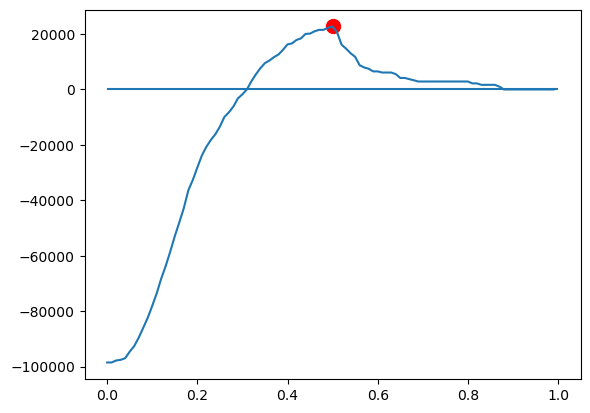

Maximum benefit at cutoff 0.5 with revenue delta of $22,732.20


In [61]:
## Generate a list of possible cutoffs and the corresponding overall revenue deltas
rev_deltas_high_value = pd.Series({cutoff: get_rev_delta_high_value(test_df, cutoff=cutoff) for cutoff in np.arange(0, 1, 0.01)})
# Generate a list of possible cutoffs and the corresponding overall revenue deltas
plot_tradeoff(rev_deltas_high_value)

<b>Note:</b> 

- In this case, it doesn't make sense to prioritize large-revenue customers, since the overall revenue delta is much lower than when targeting everyone. However, this is only the case here since the intervention doesn't depend on the number of customers (simply adjusting prices). The interventions usually go beyond simply adjusting prices to prevent churn. 
- There may be the option of intensifying the customer relation, adding key account managers, or other interventions that do incur costs depending on how many customers are targeted. In that case, it may be benefitial to target only a subset of customers to save on these costs, even if the delta in the figure above is reduced.

## Using Forecast Rather Than Actual Churn

We may have noticed above that we used actual churn outcomes in calculating the financial impact. Actual churn outcomes are fine if we know them and are conducting a retrospective analysis of the effectiveness of a strategy. This example of analysis is commonly known as "backtesting", ie seeing how well a strategy would have performed historically.

Of course, one must be careful that any analysis is done using out-of-sample data. Conducting the analysis on the training data will lead to predictions that are too optimistic.

In practice, actual outcomes may not be available because they are in the future. An alternative is to optimise predicted/forecast revenue based on the probabilities which are an output from our churn model. In this case, we would replace the actual churn outcomes (`churn`) with the predicted probability of churn from our model. The results here are obviously model-dependent.

If our model probabilities are poorly calibrated then we can end up with quite poor results from this. Going down this path therefore usually requires the extra step of checking how well calibrated the model probabilities are, and potentially correcting for any miscalibration using Platt scaling, sigmoid calibration or isotonic regression.

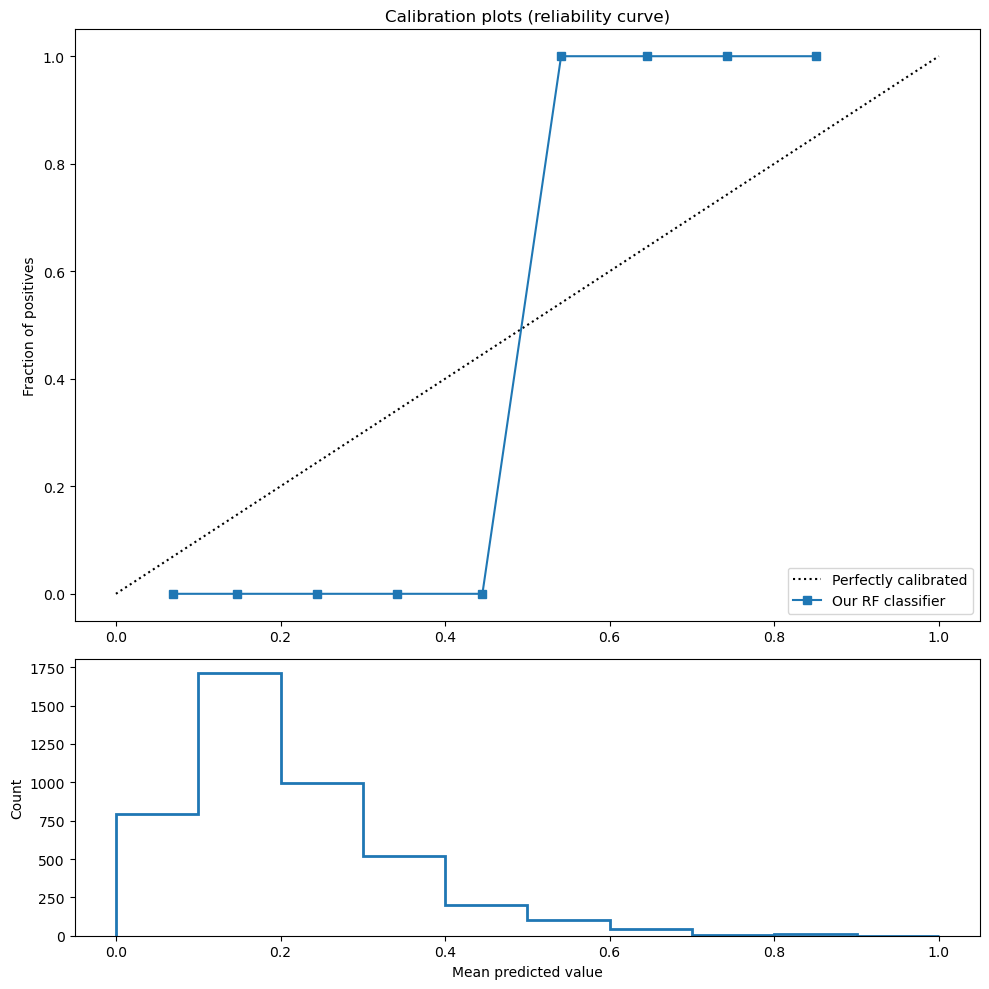

In [62]:
# Check our calibration
# (code copied from https://scikit-learn.org/stable/auto_examples/calibration/plot_calibration_curve.html)
from sklearn.calibration import calibration_curve

fig = plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))
ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
fraction_of_positives, mean_predicted_value = calibration_curve(
    y_true=test_df['churn'],
    y_prob=test_df['churn_probability'],
    n_bins=10
)
ax1.plot(mean_predicted_value, fraction_of_positives, "s-", label="Our RF classifier")
ax2.hist(test_df['churn_probability'], range=(0, 1), bins=10, histtype="step", lw=2)
ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots (reliability curve)')
ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
plt.tight_layout()

This chart tells us a few things:

- The top calibration curve exhibits a sigmoid curve, which is typical for an under-confident classifier.
- The bottom chart shows us that the model is postively skewed toward predicting a probability, perhaps due to having such low confidence.

In [63]:
# Electricity evenue for each customer consists of energy consumption (amount * price) and the meter rent
# (the power price may also play a role, but we will ignore it for now since we need to ask the client for more d
# Note that we need to reverse the log10-transformation from the data cleaning step
test_df['basecase_revenue'] = (test_df['forecast_cons_12m']) * test_df['forecast_price_energy_off_peak'] + test_df['forecast_meter_rent_12m']
# Taking churn into account
test_df['basecase_revenue_after_churn'] = test_df['basecase_revenue'] * (1 - 0.919 * test_df['churn_probability'])

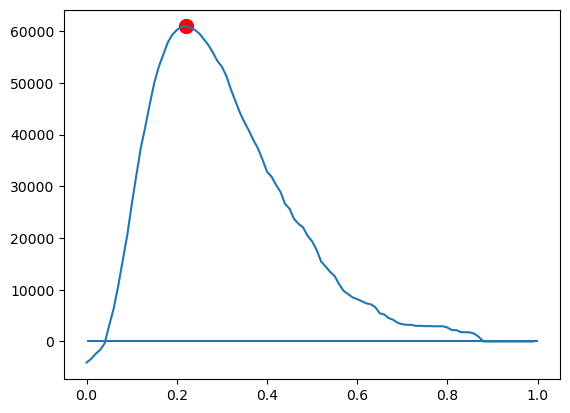

Maximum benefit at cutoff 0.22 with revenue delta of $60,888.15


In [64]:
# Generate a list of possible cutoffs and the corresponding overall revenue deltas
rev_deltas = pd.Series({cutoff: get_rev_delta(test_df, cutoff=cutoff) for cutoff in np.arange(0, 1, 0.01)})
plot_tradeoff(rev_deltas)

## How to Select the Discount?

In the strategy suggested by the SME division head we offer a 20% discount to all customer targeted. However, this might not be optimal either. We assumed before that customers offered a discount will not churn. However, that may not be true in reality. The discount may not be large enough to prevent churn.

In fact, we can predict the churn probability for each customer as a function of price, margin and other factors. Therefore, we can try to find a strategy for each customer that optimises either their expected revenue or profit.

In order to go further, we'll need to try to:
- Change the level of discount offered overall
- Predict the response of customers to that discount (ie, the churn probability) based on how much that discount affects their prices, the revenue and margin.
    - Take care that we've applied the discount to all affected variables. To make this easier, we might want to retrain our model using a simpler set of variables where we know that we can factor the discount correctly into the predictors.
- Find the discount level that balances customer retention vs the cost of false positives.

In fact, this could be turned into a 2D optimisation problem:

- Objective: maximise net revenue (ie including the benefits of true positives and the cost of false positives)
- Decision variables:
    - Level of discount offered, and
    - Fraction of people who are offered a discount

An even more sophisticated strategy is to find the right level of discount for each customer that maximises their predicted revenue or margin.